##### Problem 1 : $$ y'' + \sin{y} + 1 = 0, \ \ y(0) = 0, \ y(\pi) = 0 $$

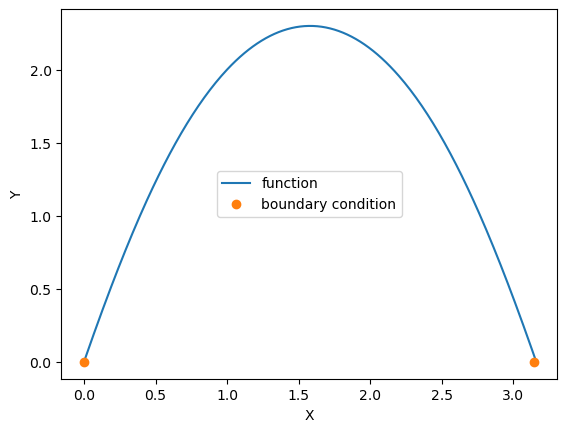

In [7]:
# shooting method

from numpy import pi, sin
import matplotlib.pyplot as plt

def bisect(y, x_start, x_end, func, max_iter=200, tol=1.0e-9) : 
    
    y_start = func(x_start)
    y_end = func(x_end)
    x_root = None

    for _ in range(max_iter) : 
        x_mid = (x_start + x_end) / 2
        y_mid = func(x_mid)

        if abs(y - y_mid) <= tol : 
            x_root = x_mid
            break

        if y_mid * y_start >= 0 : 
            x_start = x_mid
            y_start = y_mid
        
        else : 
            x_end = x_mid
            y_end = y_mid
    
    if x_root == None : 
        raise ValueError("Failed to converge.")
    
    return x_root

def shooting(x_start, x_end, h, y_dif_init, bc, func_calc, func_dif, tol=1.0e-9) : 
    y0 = bc[0]
    y_end = bc[1]
    def wrapper(y1_input) : 
        return func_calc(x_start, x_end, y0, y1_input, h, func_dif)
    
    y_dif = bisect(y_end, y_dif_init[0], y_dif_init[1], func=wrapper, tol=tol)
    
    return y_dif

def calc_yb(x_start, x_end, y0, y1, h, func) : 
    while x_start <= x_end + h : 
        y2 = func(x_start, y0)
        y1 += y2 * h
        y0 += y1 * h
        x_start += h
    return y0

def range_func(x_start, x_end, y0, y1, h, func) : 
    x_range = []
    y_range = []
    while x_start <= x_end + h : 
        x_range.append(x_start)
        y_range.append(y0)
        y2 = func(x_start, y0)
        y1 += y2 * h
        y0 += y1 * h
        x_start += h
    
    return x_range, y_range

def dif(x, y) : 
    return -1 * (sin(y) + 1)

h = 0.01
y_dif = shooting(0, pi, h, [2.5, 3], [0, 0], func_calc=calc_yb, func_dif=dif, tol=1.0e-12)

x_range, y_range = range_func(0, pi, 0, y_dif, h, dif)

plt.plot(x_range, y_range, label="function")
plt.plot([0, pi], [0, 0], 'o', label="boundary condition")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


---
#### Problem 2 : $$ \frac{d^{4}v}{dx^{4}} - \frac{N}{EI}\frac{d^{2}v}{dx^{2}} = \frac{w_{0}}{EI} $$

#### with boundary condition $$ v_{(x = 0)} = v_{(x = L)} = 0, \ \ \frac{d^{2}v}{dx^{2}}_{(x = 0)} = \frac{d^{2}v}{dx^{2}}_{(x = L)} = 0 $$

##### problem say eqaution can be shwon as,

$$ \frac{d^{4}y}{d\xi^{4}} - \beta\frac{d^{2}y}{d\xi^{2}} = 1 $$

##### with boundary condition $$ y_{(\xi = 0)} = y_{(\xi = 1)} = 0, \ \ \frac{d^{2}y}{d\xi^{2}}_{(\xi = 0)} = \frac{d^{2}y}{d\xi^{2}}_{(\xi = 1)} = 0 $$

##### as  $$ \xi = \frac{x}{L}, \ \ y = \frac{EI}{w_{0}L^{4}}v, \ \ \beta = \frac{NL^{2}}{EI} $$

---

##### Let us use finite-difference method. We can rewrite equations.

##### $$ \frac{d^{4}y_{i}}{d\xi^{4}_{i}} = \frac{y_{i - 2} - 4y_{i - 1} + 6y_{i} - 4y_{i + 1} + y_{i + 2}}{h^{4}} $$

##### $$ \frac{d^{2}y_{i}}{d\xi^{2}_{i}} = \frac{y_{i - 1} - 2y_{i} + y_{i + 1}}{h^{2}} $$

##### Therefore, equation can be shown as

##### $$ \frac{y_{i - 2} - 4y_{i - 1} + 6y_{i} - 4y_{i + 1} + y_{i + 2}}{h^{4}} - \beta\frac{y_{i - 1} - 2y_{i} + y_{i + 1}}{h^{2}} = 1 $$

##### $$ y_{i - 2} - (4 + h^{2}\beta)y_{i - 1} + (6 + 2h^{2}\beta)y_{i} - (4 + h^{2}\beta)y_{i + 1} + y_{i + 2} = h^{4} $$

---

##### Applying boundary condition $y_{i = 0} = y_{i = m} = 0, \ \ y^{(2)}_{i = 0} = y^{(2)}_{i = m} = 0$

##### $$ y^{(2)}_{0} = \frac{y_{-1} - 2y_{0} + y_{1}}{h^{2}} = 0 \ \rightarrow \ y_{-1} = y_{1} $$

##### $$ y^{(2)}_{m} = \frac{y_{m - 1} - 2y_{m} + y_{m + 1}}{h^{2}} = 0 \ \rightarrow \ y_{m + 1} = y_{m - 1} $$

##### $$ i = 1 \ \rightarrow \ y_{-1} - (4 + h^{2}\beta)y_{0} + (6 + 2h^{2}\beta)y_{1} - (4 + h^{2}\beta)y_{2} + y_{3} = h^{4}, $$
##### $$ i = 1 \ \rightarrow \ - (4 + h^{2}\beta)y_{0} + (7 + 2h^{2}\beta)y_{1} - (4 + h^{2}\beta)y_{2} + y_{3} = h^{4} $$

##### $$ i = m - 1 \ \rightarrow \ y_{m - 3} - (4 + h^{2}\beta)y_{m - 2} + (6 + 2h^{2}\beta)y_{m - 1} - (4 + h^{2}\beta)y_{m} + y_{m + 1} = h^{4} $$
##### $$ i = m - 1 \ \rightarrow \ y_{m - 3} - (4 + h^{2}\beta)y_{m - 2} + (7 + 2h^{2}\beta)y_{m - 1} - (4 + h^{2}\beta)y_{m} = h^{4} $$

---

##### So the eqaution can be shown as

$$
  \left\{ 
  \begin{aligned}
    y_{0} = 0, \ \ (i = 0) \\
    - (4 + h^{2}\beta)y_{0} + (7 + 2h^{2}\beta)y_{1} - (4 + h^{2}\beta)y_{2} + y_{3} = h^{4}, \ \ (i = 1) \\
  \end{aligned}
  \right.
$$

$$
y_{i - 2} - (4 + h^{2}\beta)y_{i - 1} + (6 + 2h^{2}\beta)y_{i} - (4 + h^{2}\beta)y_{i + 1} + y_{i + 2} = h^{4} \ \ (i = 2, \dots m - 2)
$$

$$
  \left\{ 
  \begin{aligned}
    y_{m - 3} - (4 + h^{2}\beta)y_{m - 2} + (7 + 2h^{2}\beta)y_{m - 1} - (4 + h^{2}\beta)y_{m} = h^{4}, \ \ (i = m - 1) \\
    y_{m} = 0, \ \ (i = m) \\
  \end{aligned}
  \right.
$$

---

In [8]:
import numpy as np

def gen_matrix(mesh_num, h, beta, bc) : 
    
    A = (6 + 2 * h**2 * beta) * np.eye(N=mesh_num, k=0)
    A -= (4 + h**2 * beta) * np.eye(N=mesh_num, k=1) \
        + (4 + h**2 * beta) * np.eye(N=mesh_num, k=-1)
    A += np.eye(N=mesh_num, k=2) + np.eye(N=mesh_num, k=-2)

    B = np.zeros(shape=(mesh_num), dtype=float) + h**4
    A[0,:] = 0
    A[-1,:] = 0
    A[0,0], A[-1,-1] = 1, 1
    B[0], B[-1] = bc[0], bc[1]
    
    return A, B

def finite_dif_fourth(x_start, x_end, mesh_num, beta, bc) : 

    x_range = np.linspace(x_start, x_end, mesh_num)
    h = x_range[1] - x_range[0]

    A, B = gen_matrix(mesh_num, h, beta, bc)

    return x_range, np.linalg.solve(A, B)


#### 2 - (a)

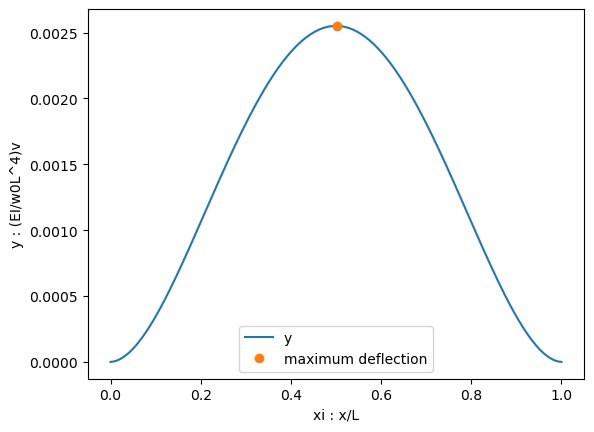

Since other variables like EI, N, L were not given,
we can only plot numerically via XI and Y dimension.
Maximum deflection of y : [0.00255]
At xi : [0.50251]


In [9]:
import matplotlib.pyplot as plt

mesh_num = 200
beta = 1.6529
bc = [0, 0]
x_range, y_range = finite_dif_fourth(0, 1, mesh_num, beta, bc)

max_index = np.where(y_range == y_range.max())

plt.plot(x_range, y_range, label="y")
plt.plot(x_range[max_index], y_range[max_index], 'o', label="maximum deflection")
plt.xlabel("xi : x/L")
plt.ylabel("y : (EI/w0L^4)v")
plt.legend()
plt.show()

print("Since other variables like EI, N, L were not given,")
print("we can only plot numerically via XI and Y dimension.")
print("Maximum deflection of y : [{:.5f}]".format(*y_range[max_index]))
print("At xi : [{:.5f}]".format(*x_range[max_index]))

#### 2 - (b)

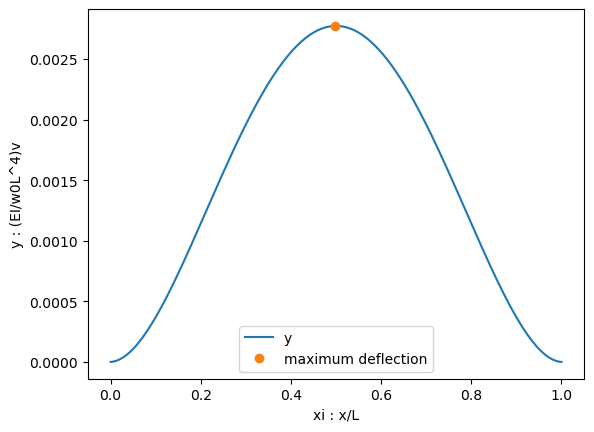

Since other variables like EI, N, L were not given,
we can only plot numerically via XI and Y dimension.
Maximum deflection of y : [0.00277]
At xi : [0.49749]


In [10]:
import matplotlib.pyplot as plt

mesh_num = 200
beta = -1.6529
bc = [0, 0]
x_range, y_range = finite_dif_fourth(0, 1, mesh_num, beta, bc)

max_index = np.where(y_range == y_range.max())

plt.plot(x_range, y_range, label="y")
plt.plot(x_range[max_index], y_range[max_index], 'o', label="maximum deflection")
plt.xlabel("xi : x/L")
plt.ylabel("y : (EI/w0L^4)v")
plt.legend()
plt.show()

print("Since other variables like EI, N, L were not given,")
print("we can only plot numerically via XI and Y dimension.")
print("Maximum deflection of y : [{:.5f}]".format(*y_range[max_index]))
print("At xi : [{:.5f}]".format(*x_range[max_index]))

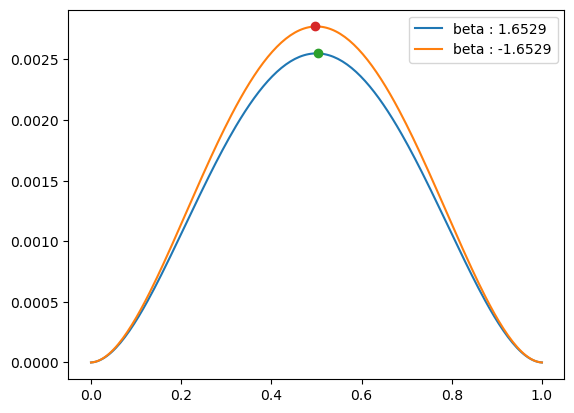

In [11]:
# comparing both plot

mesh_num = 200
beta = [1.6529, -1.6529]
bc = [0, 0]

x1_range, y1_range = finite_dif_fourth(0, 1, mesh_num, beta[0], bc)
x2_range, y2_range = finite_dif_fourth(0, 1, mesh_num, beta[1], bc)

max_index1 = np.where(y1_range == y1_range.max())
max_index2 = np.where(y2_range == y2_range.max())

plt.plot(x1_range, y1_range, label="beta : {}".format(beta[0]))
plt.plot(x2_range, y2_range, label="beta : {}".format(beta[1]))
plt.plot(x1_range[max_index1], y1_range[max_index1], 'o')
plt.plot(x2_range[max_index2], y2_range[max_index2], 'o')
plt.legend()
plt.show()

#### problem 3 :  $$ -\frac{d^{2}\psi}{d\xi^{2}} = (\xi^{2} - E'_{n})\psi $$

#### where $$ \xi = \sqrt{\frac{mw}{\hbar}}x, \ \ E'_{n} = \frac{2E_{n}}{\hbar w} = 2n + 1, \ \ n = 0, 1, 2 \dots $$

##### with boundary condition : $ \psi \rightarrow 0 $ when $ x \rightarrow \pm \ \infty $

##### $$ \frac{d^{2}y_{i}}{d\xi^{2}_{i}} = \frac{y_{i - 1} - 2y_{i} + y_{i + 1}}{h^{2}} $$

$$
-\frac{\psi_{i - 1} - 2\psi_{i} + \psi_{i + 1}}{h^{2}} = (\xi^{2} - 2n - 1)\psi_{i}
$$

$$
\psi_{i - 1} - (2 - h^{2}(\xi^{2} - 2n - 1))\psi_{i} + \psi_{i + 1} = 0
$$

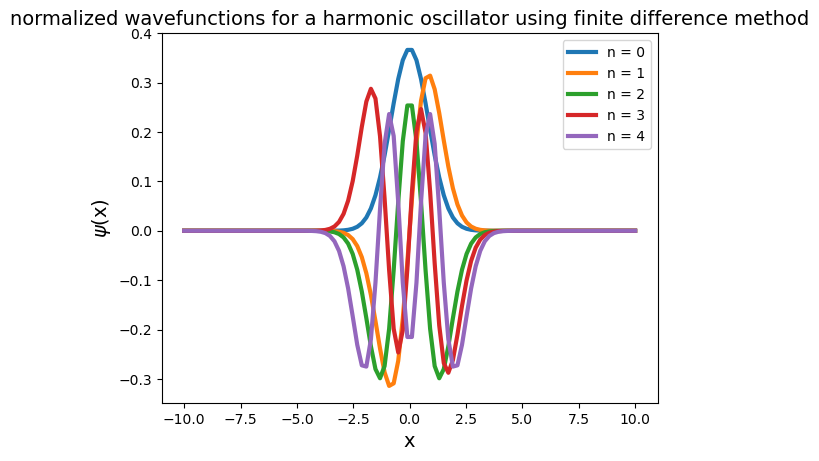

In [12]:
a = -10
b = 10
N = 100
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= x[i+1]**2
        else:
            V[i,j]=0
H = -T/(2*h**2) + V
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:5]
energies=(val[z]/val[z][0])

for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="n = {}".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title(
    'normalized wavefunctions for a harmonic oscillator using finite difference method',
    size=14
)
plt.show()